In [1]:
import pandas as pd #read in the csv file.
import numpy as np #for numerical computaions
import matplotlib.pyplot as plt #visualization
import seaborn as sns
%matplotlib inline 

In [2]:
# Creates a pandas dataframe for train data and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Do the same for test data
titanic_test = pd.read_csv("test.csv")
titanic_test.head()
#note their is no Survived column here which is our target varible we are trying to predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [5]:
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#lets see sum of missing values for each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Embarked and cabin also have missing values

In [9]:
#how about test set?
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Age, Fare and cabin has missing values. we will see how to fill missing values next.

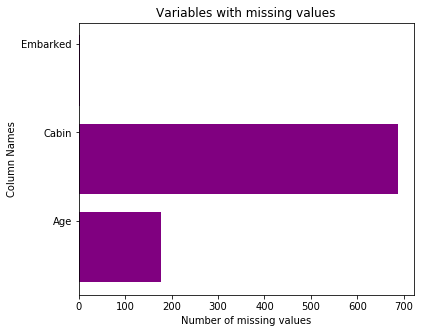

In [11]:
null_columns=titanic.columns[titanic.isnull().any()]
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Number of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

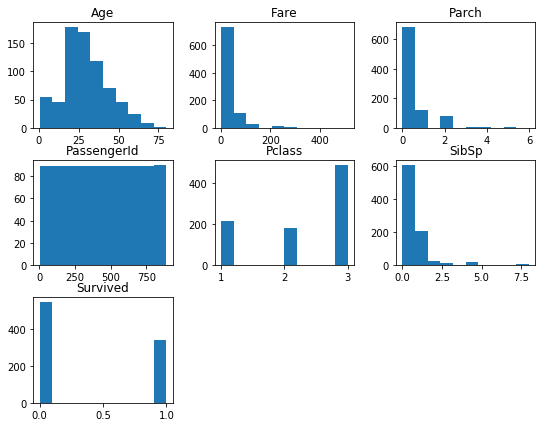

In [12]:
titanic.hist(bins=10,figsize=(9,7),grid=False);

In [13]:
#we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.

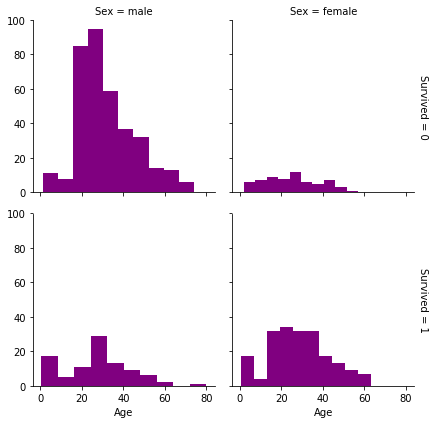

In [14]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

In [15]:
# Eventhough number of female is less than male but more females survive compare to male

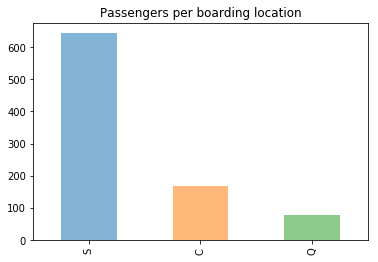

In [16]:
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

In [17]:
# Look like there are a lot of passengers in S class

C:\Users\KayToBe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


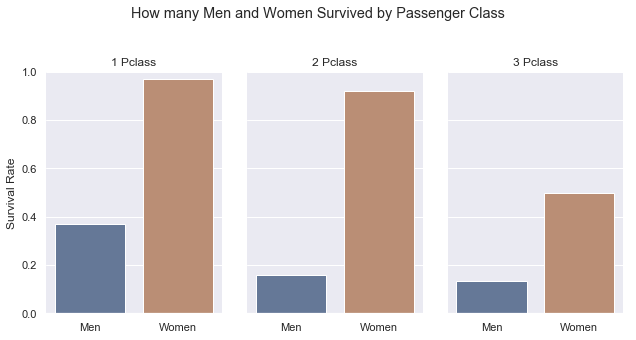

In [18]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

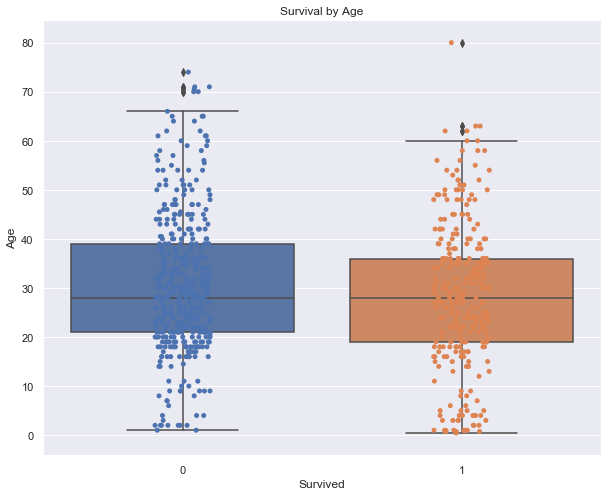

In [19]:
# Let look at survival and non survival age
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Survived", y="Age", data=titanic)
ax = sns.stripplot(x="Survived", y="Age", data=titanic, jitter=True, edgecolor="gray")
plt.title("Survival by Age",fontsize=12);

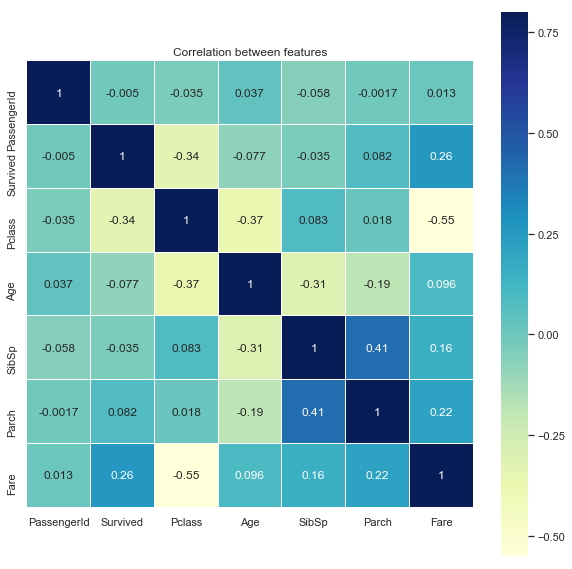

In [20]:
corr=titanic.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [21]:
#correlation of features with target variable
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [22]:
# It looks like Fare and Survived has a positive correlation and Pclass has higest negative correlation
# with Survived

## Missing Value
Its important to fill missing values

In [23]:
# Embarked Column
#Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


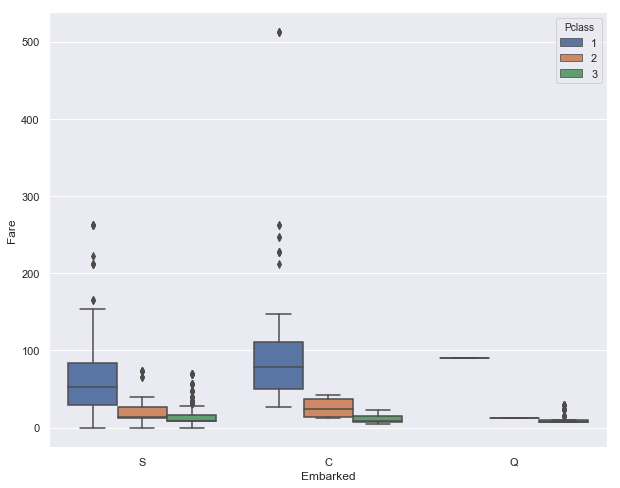

In [24]:
# PassengerId 62 and 830 have missing embarked values
# Both have Passenger class 1 and fare $80.
# Lets plot a graph to visualize and try to guess from where they embarked
plt.figure(figsize=(10,8))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic)

In [25]:
# We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. 
# So we can replace NA values in Embarked column with 'C'
titanic["Embarked"] = titanic["Embarked"].fillna('C')

In [26]:
#there is an empty fare column in test set
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


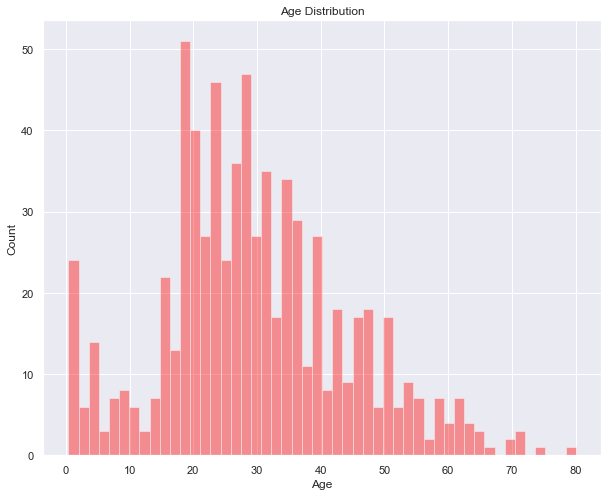

In [27]:
# Age Column
# Age seems to be promising feature. So it doesnt make sense to simply 
# fill null values out with median/mean/mode.
plt.figure(figsize=(10,8))
sns.distplot(titanic["Age"].dropna(),
                 bins=50,
                 kde=False,
                 color="red")
plt.title("Age Distribution")
plt.ylabel("Count");

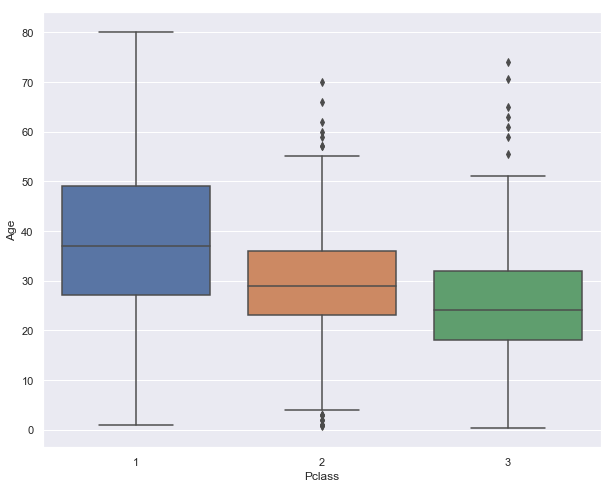

In [28]:
# Let check avg age for each Pclass
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data = titanic)

In [29]:
# We will fill null values based on avg of each Pclass
pclass1_avg_age = int(titanic[titanic.Pclass == 1].Age.mean())
pclass2_avg_age = int(titanic[titanic.Pclass == 2].Age.mean())
pclass3_avg_age = int(titanic[titanic.Pclass == 3].Age.mean())
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return pclass1_avg_age
        elif pclass == 2:
            return pclass2_avg_age
        else:
            return pclass3_avg_age
    else:
        return age

In [30]:
titanic.Age = titanic[['Age', 'Pclass']].apply(impute_age, axis= 1)

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [32]:
# Cabin column
# I personally don't think we can do much with Cabin because it contains Deck location and number which 
# is hard to guess where passanger cabin located. So, I decide to drop Cabin columns for
# both test and train data

In [33]:
titanic.drop(labels='Cabin', axis = 1, inplace=True)

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [35]:
# Test Data
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
titanic_test.drop(labels='Cabin', axis = 1, inplace=True)

In [37]:
# We will fill null values based on avg of each Pclass
pclass1_avg_age = int(titanic_test[titanic_test.Pclass == 1].Age.mean())
pclass2_avg_age = int(titanic_test[titanic_test.Pclass == 2].Age.mean())
pclass3_avg_age = int(titanic_test[titanic_test.Pclass == 3].Age.mean())
def impute_age_test(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return pclass1_avg_age
        elif pclass == 2:
            return pclass2_avg_age
        else:
            return pclass3_avg_age
    else:
        return age

In [38]:
titanic_test.Age = titanic_test[['Age', 'Pclass']].apply(impute_age_test, axis= 1)

In [39]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [40]:
# Fare column in Test data
titanic_test[titanic_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


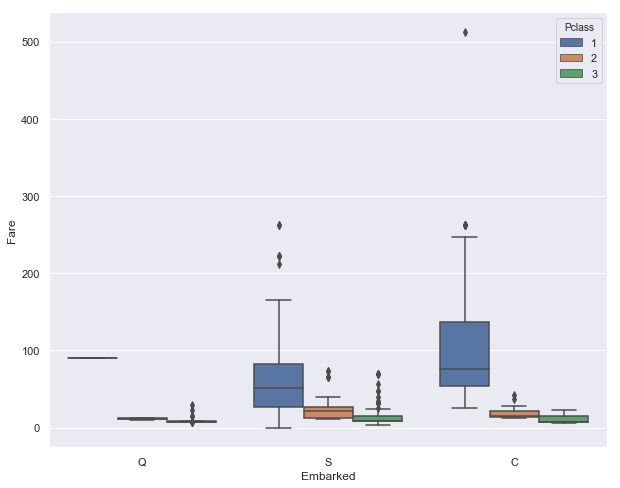

In [41]:
# PassengerId 152 has missing Fare values
# He/She is in class 3 and embarked S.
# Lets plot a graph to visualize and try to guess his/her fare
plt.figure(figsize=(10,8))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic_test)

In [42]:
# It is hard to know exact fare from the chart so let pandas help us
titanic_test[titanic_test.Embarked == 'S'][titanic_test.Pclass == 3].Fare.mean()

C:\Users\KayToBe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


13.91302978723404

In [43]:
titanic_test.Fare.fillna(value=13.9, inplace=True)

In [44]:
# Double check
titanic_test[titanic_test.PassengerId == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.9,S


In [45]:
# Check both train and test data again
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [46]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
# I will drop Ticket column on both data because I think it doesn't contribute to our ML model
titanic.drop(['Ticket'],axis=1, inplace=True)
titanic_test.drop(['Ticket'],axis=1, inplace=True)

In [49]:
# Let do the same for name columns
titanic.drop(['Name'],axis=1, inplace=True)
titanic_test.drop(['Name'],axis=1, inplace=True)

In [50]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [51]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [52]:
# Convert Categorical variables into Numerical ones

In [53]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [54]:
labelEnc=LabelEncoder()
cat_vars=['Embarked','Sex']
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [55]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [56]:
# I just noticed that we don't even need passengerId columns in train data so let drop it
titanic.drop(['PassengerId'],axis=1, inplace=True)

In [57]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [58]:
# Feature Scaling
# We can see that Age, Fare are measured on different scales, so we need to do 
# Feature Scaling first before we proceed with predictions.
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])

std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [60]:
# Time to predict
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 101)

In [61]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train, y_train)

C:\Users\KayToBe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
# Let validate our predictions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [66]:
print(confusion_matrix(y_test, predictions))

[[135  19]
 [ 40  74]]


In [67]:
print(accuracy_score(y_test, predictions))

0.7798507462686567


In [68]:
# not bad at all. We got 77% accuracy score and 71 for f1-score. Let use random forest next

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
randomFModel = RandomForestClassifier()

In [71]:
randomFModel.fit(X_train, y_train)

C:\Users\KayToBe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
randomFPredictions = randomFModel.predict(X_test)

In [73]:
print(classification_report(y_test, randomFPredictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       154
           1       0.83      0.69      0.76       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [74]:
print(confusion_matrix(y_test, randomFPredictions))

[[138  16]
 [ 35  79]]


In [75]:
print(accuracy_score(y_test, randomFPredictions))

0.8097014925373134


In [79]:
# It's clearly to us that RandomForest performs better compare to Logistic Regression
# It's time to use our test data now

In [80]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.396252,0,0,-0.497385,1
1,893,3,0,1.362608,1,0,-0.512250,2
2,894,2,1,2.522236,0,0,-0.464072,1
3,895,3,1,-0.183561,0,0,-0.482447,2
4,896,3,0,-0.570104,1,1,-0.417464,2


In [81]:
titanic_test_data = titanic_test.drop('PassengerId',axis=1)

In [83]:
test_data_predictions = randomFModel.predict(titanic_test_data)

In [85]:
# Add survival prediction column to test data
titanic_test['SurvivalPrediction'] = test_data_predictions

In [86]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SurvivalPrediction
0,892,3,1,0.396252,0,0,-0.497385,1,0
1,893,3,0,1.362608,1,0,-0.512250,2,0
2,894,2,1,2.522236,0,0,-0.464072,1,0
3,895,3,1,-0.183561,0,0,-0.482447,2,1
4,896,3,0,-0.570104,1,1,-0.417464,2,0
